# Assignment 3 Sampling

### Name    -   RAGHAV GARG
### Roll no. -  102003413
### Group   -   3CO16

In [21]:
import pandas as pd

# About Data
The dataset is highly unbalanced, the positive class (frauds) account for 1.172% of all transactions. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data could not be provided. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [22]:
data = pd.read_csv("/content/Creditcard_data.csv")

In [23]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


In [24]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import imblearn
print(imblearn.__version__)


0.8.1


In [26]:
pip install plotly-express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:

import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

#Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("darkgrid")

import plotly_express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from scipy.stats import norm
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

%matplotlib inline


On using info() function we can check if any of the columns contain null values. Looking at the output it can be seen that all the 31 columns have non-null values.


In [28]:
df = data
df.info

<bound method DataFrame.info of      Time        V1        V2        V3        V4        V5        V6  \
0       0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1       0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2       1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
..    ...       ...       ...       ...       ...       ...       ...   
767   575 -0.572263  0.731748  1.541254  0.150506  1.108974  0.372152   
768   579 -1.296845 -0.511605  2.404726 -0.310762 -0.319551 -0.542842   
769   579  1.214170  0.210481  0.484651  0.479768 -0.261955 -0.527039   
770   580  1.267030 -0.071114  0.037680  0.512683  0.242392  0.705212   
771   581  1.153758  0.132273  0.382969  1.405063 -0.224287 -0.197295   

           V7        V8        V9  ...       V21       V22       V23  \
0    0.239599  0.09

In [29]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 98.83 % of the dataset
Frauds 1.17 % of the dataset


## 98.83% -> No Frauds
## 1.17% -> Frauds

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

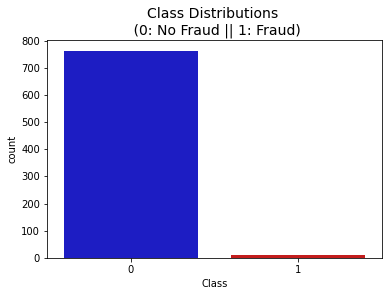

In [30]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

### Since, the dataset contains no null or missing values and all the features seem to be scaled properly, there seems to be no need of any preprocessing. Only the features Time & Amount are required to be scaled.

In [31]:


fig = make_subplots(rows=1,cols=2,subplot_titles=['Distribution of Time', 'Distribution of Amount'])
fig.add_trace(go.Histogram(name='Time',histnorm='probability',x=df.Time),1,1)
fig.add_trace(go.Histogram(name='Amount',x=df.Amount),1,2)
fig.update_xaxes(mirror=True,linecolor='black',linewidth=2,row=1,col=1)
fig.update_xaxes(mirror=True,linecolor='black',linewidth=2,row=1,col=2)
fig.update_yaxes(mirror=True,linecolor='black',linewidth=2,row=1,col=1)
fig.update_yaxes(mirror=True,linecolor='black',linewidth=2,row=1,col=2)
fig.update_layout(template='seaborn',width=700,height=300,margin=dict(t=50,b=0,l=0,r=0))
fig.show()



In [32]:
#Feature Scaling
rob_scaler = RobustScaler()
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)


In [33]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

#scaled_amount and scaled_time are added to the starting of the dataframe
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)


# Dataset After Scaling Time and Amount

In [34]:
df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.683791,-0.923077,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.282095,-0.923077,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1
2,7.307126,-0.919804,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,2.156540,-0.919804,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,1.076403,-0.916530,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.202967,0.959083,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,...,0.056544,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,0
768,1.278462,0.972177,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,...,-0.349668,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,0
769,-0.215684,0.972177,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,...,-0.071540,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,0
770,-0.086899,0.975450,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,...,-0.066990,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,0


## Balancing the data
Now I will perform EDA on the dataset to study the various features of it. Since, it is an imbalanced dataset, I would first undersample the majority class(i.e. Non-Fraud in this case) so that I can get an equal distribution of Fraud and Non-Fraud cases. For undersampling I have used Random under sampling before crossvalidation. 

# Random Under Sampling

In [35]:


#Random Under Sampling
X = df.drop('Class', axis=1)
y = df['Class']
rus = RandomUnderSampler(random_state=42)
X_rs, y_rs = rus.fit_resample(X,y)



In [36]:
#Random Under-sampled Dataframe
df_rs = pd.DataFrame(np.hstack((X_rs,y_rs[:, None])), columns=df.columns)
df_rs.Class = df_rs.Class.astype(int)
df_rs.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.154118,-0.055646,-0.491003,0.906953,1.645423,-0.083531,-0.195560,-0.710165,0.559119,0.116340,...,0.062757,-0.168067,-0.517387,0.018650,0.491652,-0.277795,0.043841,0.253372,0.111749,0
1,-0.296427,-0.320786,-0.143256,0.743649,1.534072,1.062170,0.208187,-0.838623,0.524151,-0.294661,...,0.271423,-0.205014,-0.460893,0.047407,0.339243,-0.779439,0.234456,-0.024125,-0.049898,0
2,0.038252,0.929624,1.166360,0.005061,0.497768,0.798920,-0.365524,-0.233421,-0.074210,-0.008325,...,-0.118735,-0.195728,-0.365798,0.030729,0.123133,0.381749,0.296735,-0.007175,0.011905,0
3,-0.158761,-0.504092,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,-0.160406,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,0
4,-0.276241,-0.117840,-1.069200,1.239963,0.545157,1.005354,-0.025696,-0.910673,0.422442,0.049283,...,-0.134162,0.146555,0.602990,0.132656,0.427113,-0.084030,-0.417194,-0.897885,-0.462042,0


In [38]:


print('Percentage of No Frauds: {}%'.format(round(df_rs.Class.value_counts()[0]/len(df_rs) * 100.0,2)))
print('Percentage of Frauds: {}%'.format(round(df_rs.Class.value_counts()[1]/len(df_rs) * 100.0,2)))



Percentage of No Frauds: 50.0%
Percentage of Frauds: 50.0%


# Smote Oversampling

In [40]:
df2 = data

In [41]:
df2

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.683791,-0.923077,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.282095,-0.923077,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1
2,7.307126,-0.919804,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,2.156540,-0.919804,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,1.076403,-0.916530,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.202967,0.959083,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,...,0.056544,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,0
768,1.278462,0.972177,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,...,-0.349668,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,0
769,-0.215684,0.972177,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,...,-0.071540,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,0
770,-0.086899,0.975450,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,...,-0.066990,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,0


In [42]:
#smote
X = df2.drop('Class', axis=1)
y = df2['Class']
oversample = SMOTE()
#rus = RandomUnderSampler(random_state=42)
#X_rs, y_rs = rus.fit_resample(X,y)
X_smo, y_smo = oversample.fit_resample(X, y)

In [43]:
df_smo = pd.DataFrame(np.hstack((X_smo,y_smo[:, None])), columns=df2.columns)
df_smo.Class = df_smo.Class.astype(int)
df_smo.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.683791,-0.923077,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.282095,-0.923077,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1
2,7.307126,-0.919804,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,2.156540,-0.919804,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,1.076403,-0.916530,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [45]:
print('Percentage of No Frauds: {}%'.format(round(df_smo.Class.value_counts()[0]/len(df_smo) * 100.0,2)))
print('Percentage of Frauds: {}%'.format(round(df_smo.Class.value_counts()[1]/len(df_smo) * 100.0,2)))

Percentage of No Frauds: 50.0%
Percentage of Frauds: 50.0%


# SMOTE + ENN Sampling

In [47]:
df3 = data
df3

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.683791,-0.923077,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.282095,-0.923077,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1
2,7.307126,-0.919804,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,2.156540,-0.919804,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,1.076403,-0.916530,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.202967,0.959083,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,...,0.056544,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,0
768,1.278462,0.972177,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,...,-0.349668,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,0
769,-0.215684,0.972177,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,...,-0.071540,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,0
770,-0.086899,0.975450,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,...,-0.066990,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,0


In [48]:
#ENN sampling
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import cross_validate

In [49]:
X = df3.drop('Class', axis = 1)
y = df3['Class']
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
Xsmee , ysmee = resample.fit_resample(X,y)

In [50]:
df_smee = pd.DataFrame(np.hstack((Xsmee,ysmee[:, None])), columns=df3.columns)
df_smee.Class = df_smee.Class.astype(int)
df_smee.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.683791,-0.923077,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,7.307126,-0.919804,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
2,2.156540,-0.919804,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
3,1.076403,-0.916530,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
4,-0.262313,-0.916530,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0


In [51]:
print('Percentage of No Frauds: {}%'.format(round(df_smee.Class.value_counts()[0]/len(df_smee) * 100.0,2)))
print('Percentage of Frauds: {}%'.format(round(df_smee.Class.value_counts()[1]/len(df_smee) * 100.0,2)))

Percentage of No Frauds: 48.17%
Percentage of Frauds: 51.83%


# Stratified Sampling

In [52]:
#stratified Sampling
df4 = data
df4

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.683791,-0.923077,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.282095,-0.923077,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1
2,7.307126,-0.919804,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,2.156540,-0.919804,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,1.076403,-0.916530,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.202967,0.959083,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,...,0.056544,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,0
768,1.278462,0.972177,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,...,-0.349668,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,0
769,-0.215684,0.972177,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,...,-0.071540,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,0
770,-0.086899,0.975450,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,...,-0.066990,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,0


In [53]:
# we create a function to check if the data is proportional based on a pre-defined variable.
def counts(df, var):
    c = df[var].value_counts(dropna=False)
    p = df[var].value_counts(dropna=False, normalize=True)
    return pd.concat([c,p], axis=1, keys=['counts', '%'])

In [54]:
from sklearn.model_selection import StratifiedShuffleSplit as ss

In [55]:
#using the sklearn function to obtain the sample, 
# based on 10% of the stratified elements in the default variable.

sp = ss(test_size=0.1)
for x, y in sp.split(df4, df4['Class']):
    dfx = df4.iloc[x]
    dfy = df4.iloc[y]

#dfx.shape, dfy.shape

print('sample:',dfy.shape[0],'\n')
display(counts(dfy, 'Class'))

sample: 78 



,counts,%
0,77,0.987179
1,1,0.012821


In [56]:
# function for extracting stratified samples with useful parameters

def sample_stratified(dataframe, size, variable):
    sp = ss(test_size=size)
    for _, y in sp.split(dataframe, dataframe[variable]):
        dataframey = dataframe.iloc[y]
    return dataframey

In [57]:
df_sample_stratified = sample_stratified(df4, 0.1, 'Class')

display(df_sample_stratified.head(3))
print('\n')

display(df_sample_stratified.shape)
print('\n')

display(counts(df_sample_stratified,'Class'))
print('\n')

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
654,16.515442,0.697218,-0.239505,-3.940241,-0.147576,-0.671347,-2.239256,0.908178,-0.377398,0.157943,...,1.217690,0.076296,-1.132178,-0.486820,-0.302911,-0.304121,-0.469811,-0.077517,0.151745,0
180,0.428442,-0.540098,0.805682,-0.220451,2.371310,4.075817,-0.844073,2.546394,-1.435114,0.942048,...,-0.197554,0.185844,0.916783,-0.075911,-0.243420,0.246029,0.283515,0.113704,0.031697,0
70,1.035628,-0.772504,1.006589,-0.071105,0.347614,1.329684,-0.193240,0.155418,0.008574,0.146538,...,-0.091367,-0.020239,-0.018881,-0.120966,0.027382,0.593864,-0.334688,0.021368,0.015080,0


(78, 31)

,counts,%
0,77,0.987179
1,1,0.012821


In [58]:
def sample_stratified(dataframe, size, variable):
    p = (size / len(dataframe))
    sp = ss(test_size=p)
    for _, y in sp.split(dataframe, dataframe[variable]):
        dataframey = dataframe.iloc[y]
    return dataframey

In [59]:
df_sample_stratified = sample_stratified(df_smo, 100, 'Class')

display(df_sample_stratified.head(3))
print('\n')

display(df_sample_stratified.shape)
print('\n')

display(counts(df_sample_stratified,'Class'))
print('\n')

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
767,0.202967,0.959083,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,...,0.056544,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,0
1208,-0.309927,0.927324,1.256721,0.363244,0.304793,0.686962,-0.351457,-1.052546,0.091648,-0.205822,...,-0.073708,-0.285930,-0.817899,0.127263,0.332773,0.220302,0.094869,-0.021989,0.030698,1
36,0.279067,-0.834697,-0.246046,0.473267,1.695738,0.262411,-0.010866,-0.610836,0.793937,-0.247253,...,0.045721,-0.194600,-0.335133,-0.078180,0.392784,-0.031157,0.198037,-0.175347,-0.203616,0


(100, 31)

,counts,%
0,50,0.5
1,50,0.5


# Systematic Sampling
## Taking balanced data from smote

In [60]:
size = 100
length = len(df_smo)
interval = length // size
print('interval:',interval)

interval: 15


In [61]:
import random as rd

In [62]:
#define the seed of random. 'None' paramn will allow random change every execution.
rd.seed(None) #or rd.seed(1) to change the number every execution this part of the code.

first = rd.randint(0, interval)
print('first element:',first)

first element: 15


In [63]:
indexes = np.arange(first, length, step = interval)
indexes

array([  15,   30,   45,   60,   75,   90,  105,  120,  135,  150,  165,
        180,  195,  210,  225,  240,  255,  270,  285,  300,  315,  330,
        345,  360,  375,  390,  405,  420,  435,  450,  465,  480,  495,
        510,  525,  540,  555,  570,  585,  600,  615,  630,  645,  660,
        675,  690,  705,  720,  735,  750,  765,  780,  795,  810,  825,
        840,  855,  870,  885,  900,  915,  930,  945,  960,  975,  990,
       1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155,
       1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320,
       1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440, 1455, 1470, 1485,
       1500, 1515])

In [64]:
df_sample_systematic = df_smo.iloc[indexes]
display(df_sample_systematic.head(3))
print('\n')

display(df_sample_systematic.shape)
print('\n')

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
15,-0.013625,-0.883797,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,...,0.263451,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,0
30,0.012414,-0.844517,1.237429,0.061043,0.380526,0.761564,-0.359771,-0.494084,0.006494,-0.133862,...,-0.066351,-0.245682,-0.530900,-0.044265,0.079168,0.509136,0.288858,-0.022705,0.011836,0
45,0.094368,-0.811784,1.138316,0.056956,0.649419,0.873062,-0.468466,-0.410195,-0.013898,-0.072440,...,-0.078355,-0.164222,-0.247401,0.059405,0.456286,0.361004,0.274414,-0.002498,0.017109,0


(101, 31)

In [65]:
def sample_systematic(dataframe, sample_size, state = None):
    length = len(df_smo)
    interval = length // sample_size
    rd.seed(state)
    first = rd.randint(0, interval)
    indexes = np.arange(first, length, step = interval)
    return dataframe.iloc[indexes]

In [66]:
df_sample_systematic = sample_systematic(df_smo, 100)

display(df_sample_systematic.head(3))
print('')

display(df_sample_systematic.shape)
print('')

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
8,1.544913,-0.900164,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0
23,0.122830,-0.864157,0.247491,0.277666,1.185471,-0.092603,-1.314394,-0.150116,-0.946365,-1.617935,...,-0.230983,1.650180,0.200454,-0.185353,0.423073,0.820591,-0.227632,0.336634,0.250475,0
38,0.078018,-0.828151,0.996370,-0.122589,0.546819,0.706580,0.134560,1.156995,-0.294561,0.407429,...,-0.203461,-0.076302,0.108867,0.162231,-0.575624,0.109795,0.373813,0.050552,0.005106,0


(102, 31)

In [67]:
print('Percentage of No Frauds: {}%'.format(round(df_sample_systematic.Class.value_counts()[0]/len(df_sample_systematic) * 100.0,2)))
print('Percentage of Frauds: {}%'.format(round(df_sample_systematic.Class.value_counts()[1]/len(df_sample_systematic) * 100.0,2)))

Percentage of No Frauds: 49.02%
Percentage of Frauds: 50.98%


# Applying Classifiers Models on these sampled datasets

I'll be using 5 different classifiers to classify the transactions as Fraudulant or Non-Fraudulant in the randomly undersampled dataset. My aim is to compare the performance of the Naive predictor with that of the classifiers that I choose. The following are the classifiers that I'll be using:-

    Logistic Regression
    Support Vector Classifier
    Decision Tree
    KNearest Classifier
    SGD Classifier


In [68]:
array_random_sampling  = []
array_smote = []
array_smee = []
array_systematic = []
array_stratified = []

# Models on Random Under Sampling

In [69]:
# ML models on Random Under Sampling
# Undersampling before cross validation(prove to overfit)
X = df_rs.drop('Class', axis=1)
y = df_rs['Class'] 


In [70]:
from sklearn.linear_model import SGDClassifier

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
#Convert to arrays to feed to the classifications algorithms
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNearest": KNeighborsClassifier(),
    "SGD Classifier": SGDClassifier()
    
    
}

In [73]:
print('Cross-Validation Scores:-')
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('{}: {}'.format(key,round(cv_score.mean()*100.0, 2)))
    array_random_sampling.append(round(cv_score.mean()*100.0, 2))
   

Cross-Validation Scores:-
Logistic Regression: 80.0
Support Vector Classifier: 63.33
Decision Tree: 73.33
KNearest: 36.67
SGD Classifier: 93.33


In [74]:
array_random_sampling

[80.0, 63.33, 73.33, 36.67, 93.33]

# Models on Smote Over Sampling

In [75]:
#SMOTE models
X = df_smo.drop('Class', axis=1)
y = df_smo['Class']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
print('Cross-Validation Scores:-')
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('{}: {}'.format(key,round(cv_score.mean()*100.0, 2)))
    array_smote.append(round(cv_score.mean()*100.0, 2))

Cross-Validation Scores:-
Logistic Regression: 92.54
Support Vector Classifier: 97.54
Decision Tree: 97.54
KNearest: 95.74
SGD Classifier: 92.38


# Models on SMOTE + ENN Sampling

In [78]:
#ML on SMEE sampling
#SMOTE models
X = df_smee.drop('Class', axis=1)
y = df_smee['Class']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
print('Cross-Validation Scores:-')
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('{}: {}'.format(key,round(cv_score.mean()*100.0, 2)))
    array_smee.append(round(cv_score.mean()*100.0, 2))

Cross-Validation Scores:-
Logistic Regression: 93.97
Support Vector Classifier: 98.13
Decision Tree: 98.22
KNearest: 97.11
SGD Classifier: 94.05


# Models on Sample Stratified Sampling

In [81]:
#ML on Sample Stratified
#sample stratifies
X = df_sample_stratified.drop('Class', axis=1)
y = df_sample_stratified['Class']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
print('Cross-Validation Scores:-')
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('{}: {}'.format(key,round(cv_score.mean()*100.0, 2)))
    array_stratified.append(round(cv_score.mean()*100.0, 2))

Cross-Validation Scores:-
Logistic Regression: 85.0
Support Vector Classifier: 85.0
Decision Tree: 86.25
KNearest: 63.75
SGD Classifier: 88.75


# Models on Sample Systematic Sampling

In [84]:
#ML on Sample Systematic
#sample systematic
X = df_sample_systematic.drop('Class', axis=1)
y = df_sample_systematic['Class']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
print('Cross-Validation Scores:-')
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('{}: {}'.format(key,round(cv_score.mean()*100.0, 2)))
    array_systematic.append(round(cv_score.mean()*100.0, 2))

Cross-Validation Scores:-
Logistic Regression: 88.9
Support Vector Classifier: 90.15
Decision Tree: 75.51
KNearest: 68.01
SGD Classifier: 84.12


In [87]:
keys = ['Random Sampling','Smote','SMEE Oversampling','Sample Stratified','Sample Systematic']

# Making a table for defined view of CV Score of Models on different samplings

In [88]:
from tabulate import tabulate
print(tabulate({'Classifiers Models':['Logistic Regression','Support Vector Classifier','Desicion Tree','KNearest','SGD Classifier'],
    'Random Sampling': array_random_sampling, 
                'Smote': array_smote, 
                'Smee Oversampling': array_smee,
               'Sample Stratified': array_stratified,
               'Sample Systematic': array_systematic}, 
                headers='keys', 
                tablefmt='fancy_grid'))

╒═══════════════════════════╤═══════════════════╤═════════╤═════════════════════╤═════════════════════╤═════════════════════╕
│ Classifiers Models        │   Random Sampling │   Smote │   Smee Oversampling │   Sample Stratified │   Sample Systematic │
╞═══════════════════════════╪═══════════════════╪═════════╪═════════════════════╪═════════════════════╪═════════════════════╡
│ Logistic Regression       │             80    │   92.54 │               93.97 │               85    │               88.9  │
├───────────────────────────┼───────────────────┼─────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ Support Vector Classifier │             63.33 │   97.54 │               98.13 │               85    │               90.15 │
├───────────────────────────┼───────────────────┼─────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ Desicion Tree             │             73.33 │   97.54 │               98.22 │               86.25 │               

## Conclusion
### Clearly we can see the Support Vector Classifier and Desicion Tree Classifier give us the highest value in SMOTE + ENN Sampling which is 98.39%.
